# Exploratory Data Analysis

## Setup

In [1]:
import datetime
import ipywidgets as widgets
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2
import seaborn as sns

In [2]:
conn = psycopg2.connect(
    host="localhost",
    database="cars",
    user="postgres",
    password="123456789",
    port=5432
)

In [3]:
query = "SELECT * FROM cars"
df = pd.read_sql_query(query, conn, index_col='index')

C:\Users\saind\AppData\Local\Temp\ipykernel_1576\2524249782.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, index_col='index')


In [4]:
df

,Active_Since,Times_Viewed,Price_in_Euros,Ad_title,Fuel_Type,Total_Kilometers,Production_Year,Engine_Power_in_kW,Color,Transmission_Gears_Count,Number_of_Doors,Car_Body_Style,Fuel_Economy_L/100km,Number_of_Previous_Owners,Drive_Type,Transmission_Type,Make,Model,Town,County
index,,,,,,,,,,,,,,,,,,,,
0,2023-03-29,18,13600.0,"VW GOLF 7.5 1.6 TDI,NOVI MODEL,NAVI,REG. GOD. ...",Diesel,215000,2018-01-01,85,Black,5,5,Sedan,NaN,Two,FWD,Manual,Volkswagen,Golf,Osijek,Osječko-baranjska
1,2023-03-29,9,7500.0,Ford S-Max 2.0 tdci\r\n,Diesel,304730,2011-01-01,103,White,6,5,Sedan,NaN,Two,FWD,Manual,Ford,S-Max,Labin,Istarska
2,2023-03-29,8,7700.0,"Škoda Octavia 1,6 tdi 105 ks\r\n",Diesel,157000,2012-01-01,77,Grey,5,5,Station Wagon,NaN,One,FWD,Manual,Škoda,Octavia,Sveta Nedelja,Zagrebačka
3,2023-03-29,20,5700.0,BMW serija 3 Touring 320D LCI REDIZAJN**2009 G...,Diesel,385000,2009-01-01,130,Grey,5,5,Station Wagon,NaN,Two,RWD,Automatic,BMW,series 3,Slatina,Virovitičko-podravska
4,2023-03-29,21,11299.0,"VW GOLF VII 1.6 TDI,NAVI,OSRAM LED,SERVISNA,6 ...",Diesel,205000,2016-01-01,81,Grey,6,5,Sedan,NaN,Two,FWD,Manual,Volkswagen,Golf,Osijek,Osječko-baranjska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14033,2017-11-20,2703,6000.0,Mercedes CLK coupe 270cdi avantgarde\r\n,Diesel,241000,2005-01-01,125,Silver,5,2,Coupe,6.0,Two,RWD,Automatic,Mercedes-Benz,CLK coupe,Vukovar,Vukovarsko-srijemska
14034,2017-11-03,8882,20499.0,"Audi TT, 2.0TDI, full oprema, quattro, reg.6mj...",Diesel,155000,2013-01-01,125,Red,6,3,Coupe,6.0,Two,4WD,Semi-Automatic,Audi,Tt,Velika Gorica,Zagrebačka
14035,2017-06-25,7517,5700.0,HITNO Opel Vivaro 1.9 cdti 2007. Produzeni OBN...,Diesel,525000,2007-01-01,74,Grey,6,5,Minivan,8.0,Two,FWD,Manual,Opel,Vivaro,Osijek,Osječko-baranjska


In [5]:
purple20 = ['#220a3d', '#351061', '#3f1272', '#491584', '#521895', '#5c1ba7', '#661eb8', '#7021ca', '#7923dc', '#8435de', '#8f47e1', '#9958e4', '#a46ae7', '#af7bea', '#b98ded', '#c49eef', '#cfb0f2', '#dac2f5', '#e4d3f8', '#efe5fb']
purple10 = purple20[1::2]
purple8 = purple20[4::2]
purple7 = purple20[::3]
purple5 = purple10[::2]
purple4 = purple20[::5]
purple3 = purple20[::7]
palette8=['#9ebbff', '#1e5be8', '#008D91', '#94dee0', '#FABCA5', '#E06C41', '#C9329C', '#FAA2E0']
heat=['#008D91', '#94dee0', '#FABCA5', '#E06C41']

orchid = '#FAA2E0'
lilac = '#cb9eff'
median='#3B7A7E'
mean='#C58120'

## Inspecting the Data

I've cleaned this dataset to my best ability regarding missing and mistaken values in another notebook. As I've explained there the only column for which I tolerated the null values is Fuel Economy because it contains more than 9068 records with null values. So when I do any analysis regarding fuel economy of these cars my plan is to work with the subset with valid values in that column.

Another thing that I've noticed while cleaning this data is that I should expect some anomalies. This data comes from an ad site where people fill in the info about the car that they're selling and that info is mainly not controlled. So, I'm expecting inconsistencies in for example engine power in kW, fuel economy or total kilometers travelled. 
This data feels great for the purpose of this exercise and learning but I would think before using certain info to make any important decision.

In [6]:
df.isnull().sum()

Active_Since                    0
Times_Viewed                    0
Price_in_Euros                  0
Ad_title                        0
Fuel_Type                       0
Total_Kilometers                0
Production_Year                 0
Engine_Power_in_kW              0
Color                           0
Transmission_Gears_Count        0
Number_of_Doors                 0
Car_Body_Style                  0
Fuel_Economy_L/100km         9068
Number_of_Previous_Owners       0
Drive_Type                      0
Transmission_Type               0
Make                            0
Model                           0
Town                            0
County                          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

Active_Since                  object
Times_Viewed                   int64
Price_in_Euros               float64
Ad_title                      object
Fuel_Type                     object
Total_Kilometers               int64
Production_Year               object
Engine_Power_in_kW             int64
Color                         object
Transmission_Gears_Count       int64
Number_of_Doors                int64
Car_Body_Style                object
Fuel_Economy_L/100km         float64
Number_of_Previous_Owners     object
Drive_Type                    object
Transmission_Type             object
Make                          object
Model                         object
Town                          object
County                        object
dtype: object

In [9]:
df['Active_Since'] = pd.to_datetime(df['Active_Since'])

In [10]:
df['Production_Year'] = pd.to_datetime(df['Production_Year'])

In [11]:
df[df['Total_Kilometers'] < 1000]

,Active_Since,Times_Viewed,Price_in_Euros,Ad_title,Fuel_Type,Total_Kilometers,Production_Year,Engine_Power_in_kW,Color,Transmission_Gears_Count,Number_of_Doors,Car_Body_Style,Fuel_Economy_L/100km,Number_of_Previous_Owners,Drive_Type,Transmission_Type,Make,Model,Town,County
index,,,,,,,,,,,,,,,,,,,,
266,2023-03-28,5,7100.0,VW Up!\r\n,Gasoline,1,2015-01-01,44,White,5,5,Sedan,NaN,Two,FWD,Manual,Volkswagen,Up!,Zagreb,Zagrebačka
1621,2023-03-20,283,4900.0,Mazda 5 2.0 cd145\r\n,Diesel,3,2007-01-01,105,Black,7,5,MPV,6.0,Two,FWD,Manual,Mazda,5,Vrbovec,Zagrebačka
2836,2023-03-11,559,7900.0,BMW e90 320d LCI\r\n,Diesel,1,2009-01-01,130,Grey,6,5,Sedan,6.0,Two,RWD,Manual,BMW,series 3,Jastrebarsko,Zagrebačka
4837,2023-02-16,1104,2400.0,VW Golf V Variant 1.9tdi dsg\r\n,Diesel,3,2008-01-01,77,White,5,5,Sedan,NaN,Two,FWD,Manual,Volkswagen,Golf V Variant,Rijeka,Primorsko-goranska
10672,2022-09-02,3047,7999.0,Volvo S80 2.4D\r\n,Diesel,1,2009-01-01,151,Grey,6,5,Sedan,NaN,Two,FWD,Automatic,Volvo,S80,Visoko,Varaždinska
10744,2022-08-29,3627,1600.0,Nissan Pick Up 2.5d 4wd\r\n,Diesel,1,1992-01-01,59,White,5,5,SUV,NaN,Two,4WD,Manual,Nissan,Pick,Novska,Sisačko-moslavačka
10749,2022-08-29,2285,5400.0,Citroen C4 Picasso C4 picaso\r\n,Diesel,1,2012-01-01,82,White,6,5,MPV,6.0,Two,FWD,Manual,Citroen,C4 Picasso,Velika Gorica,Zagrebačka
11515,2022-07-26,6013,7000.0,VW Transporter T5\r\n,Diesel,4,2009-01-01,63,White,5,5,Minivan,NaN,Two,FWD,Manual,Volkswagen,Transporter,Karlovac,Karlovačka
13143,2022-04-24,3078,3200.0,BMW serija 3 320D zvati na 0911310384\r\n,Diesel,1,2004-01-01,110,Black,5,5,Sedan,NaN,Two,RWD,Manual,BMW,series 3,Split,Splitsko-dalmatinska


In [12]:
df[df['Total_Kilometers'] > 500000]

,Active_Since,Times_Viewed,Price_in_Euros,Ad_title,Fuel_Type,Total_Kilometers,Production_Year,Engine_Power_in_kW,Color,Transmission_Gears_Count,Number_of_Doors,Car_Body_Style,Fuel_Economy_L/100km,Number_of_Previous_Owners,Drive_Type,Transmission_Type,Make,Model,Town,County
index,,,,,,,,,,,,,,,,,,,,
1040,2023-03-24,422,3500.0,BMW serija 5 E39\r\n,Diesel,579000,1999-01-01,135,Black,5,4,Sedan,NaN,Two,RWD,Automatic,BMW,series 5,Čakovec,Međimurska
1292,2023-03-23,311,3000.0,Mercedes-Benz C-klasa C 250td\r\n,Diesel,557000,1996-01-01,110,Blue,5,5,Sedan,7.0,Two,RWD,Manual,Mercedes-Benz,C-class,Trpinja,Vukovarsko-srijemska
1784,2023-03-19,626,5400.0,BMW serija 5 530XD\r\n,Diesel,540000,2005-01-01,170,Black,6,5,Sedan,NaN,Two,4WD,Manual,BMW,series 5,Sveti Ivan Zelina,Zagrebačka
1829,2023-03-19,452,4000.0,"VW Passat 3.2 fsi v6 4motion, moguća zamjena\r\n",Gasoline,556000,2007-01-01,184,Blue,6,5,Station Wagon,NaN,Two,4WD,Automatic,Volkswagen,Passat,Zagreb,Zagrebačka
1944,2023-03-18,1135,1600.0,Mercedes-Benz E-klasa 220CDI\r\n,Diesel,557000,2000-01-01,105,Silver,6,5,Sedan,NaN,Three or more,RWD,Manual,Mercedes-Benz,E-class,Velika Gorica,Zagrebačka
2537,2023-03-13,337,1400.0,Lancia Lybra SW 2.4 JTD SX\r\n,Diesel,665000,2004-01-01,110,Silver,5,5,Station Wagon,6.5,Three or more,FWD,Manual,Lancia,Lybra SW,Čeminac,Osječko-baranjska
2892,2023-03-10,456,2150.0,Škoda Octavia 1.9 TDI\r\n,Diesel,712000,2000-01-01,81,Silver,5,5,Sedan,NaN,One,FWD,Manual,Škoda,Octavia,Rijeka,Primorsko-goranska
3138,2023-03-08,435,1600.0,Audi A3 1.9tdi 81kw\r\n,Diesel,530000,1998-01-01,81,Blue,5,3,Sedan,NaN,Two,FWD,Manual,Audi,A3,Velika Gorica,Zagrebačka
3199,2023-03-08,447,1600.0,Audi A3 1.9tdi 81kw\r\n,Diesel,530000,1998-01-01,81,Blue,5,3,Sedan,NaN,Two,FWD,Manual,Audi,A3,Velika Gorica,Zagrebačka


I'm going to delete all the cars with 10 and below kilometers on the gauge because I'm pretty confident that those are mistaken values, as well as 2020 car with 950 000 kilometers travelled and a 2017 Audi selling for 20 000€ with 660 000 kilometers.

In [13]:
df = df.drop(df[df['Total_Kilometers'] < 1000].index)

In [14]:
df = df.drop([13314, 9358])

I'm going to add a column with the calculated ages of the cars.

In [15]:
current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Production_Year'].dt.year

## Analysis

Here I'm performing a high-level exploratory analysis to find out main characteristics of the cars on the Croatian used vehicles market as it was in March 2023.

In [16]:
df.describe()

,Times_Viewed,Price_in_Euros,Total_Kilometers,Engine_Power_in_kW,Transmission_Gears_Count,Number_of_Doors,Fuel_Economy_L/100km,Age
count,14025.000000,14025.000000,14025.000000,14025.00000,14025.000000,14025.000000,4965.000000,14025.000000
mean,1134.015971,10648.957504,204463.096471,91.95016,5.414260,4.690695,6.176636,13.897112
std,1317.404604,12816.725288,91839.907091,35.81240,0.606413,0.740322,1.559408,6.248734
min,8.000000,1000.000000,1000.000000,12.00000,4.000000,2.000000,0.000000,0.000000
25%,374.000000,3200.000000,145600.000000,70.00000,5.000000,5.000000,5.000000,9.000000
50%,726.000000,6666.000000,202000.000000,85.00000,5.000000,5.000000,6.000000,14.000000
75%,1335.000000,13000.000000,262000.000000,107.00000,6.000000,5.000000,7.000000,18.000000
max,28226.000000,99900.000000,800000.000000,530.00000,7.000000,6.000000,20.000000,68.000000


### Car history and location

#### Age

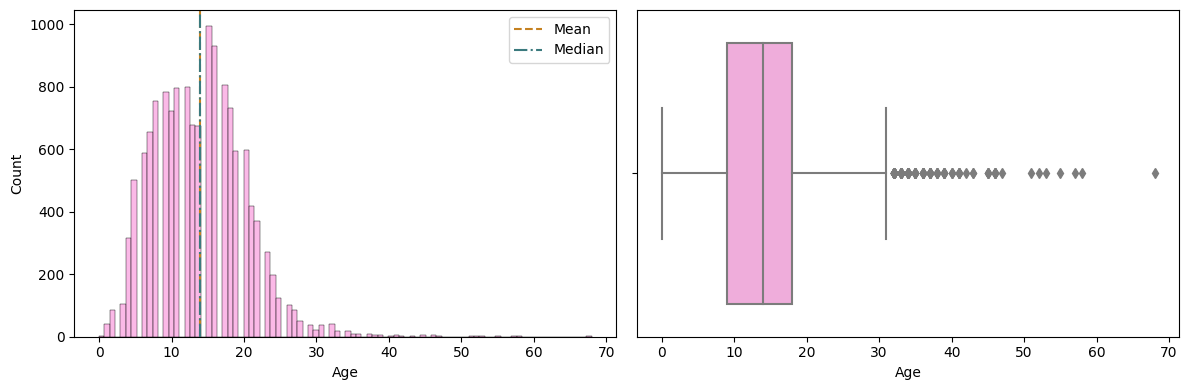

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))

sns.histplot(df['Age'], color=orchid, ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.axvline(df['Age'].mean(), color=mean, linestyle='--', label='Mean')
ax1.axvline(df['Age'].median(), color=median, linestyle='-.', label='Median')
ax1.legend()

sns.boxplot(x=df['Age'], color=orchid, ax=ax2)
ax2.set_xlabel('Age')

plt.tight_layout()
plt.show()

In [18]:
df[df['Age'] > 40]

,Active_Since,Times_Viewed,Price_in_Euros,Ad_title,Fuel_Type,Total_Kilometers,Production_Year,Engine_Power_in_kW,Color,Transmission_Gears_Count,...,Car_Body_Style,Fuel_Economy_L/100km,Number_of_Previous_Owners,Drive_Type,Transmission_Type,Make,Model,Town,County,Age
index,,,,,,,,,,,,,,,,,,,,,
653,2023-03-26,628,10500.0,"Mercedes-Benz 115 220d, prilika za ljubitelje!...",Diesel,159000,1970-01-01,44,White,4,...,Sedan,8.0,Two,RWD,Manual,Mercedes-Benz,116,Zagreb,Zagrebačka,53
716,2023-03-26,550,3000.0,Jeep CJ Gaz\r\n,Diesel,190000,1966-01-01,90,White,5,...,Sedan,NaN,Two,FWD,Manual,Jeep,Cj,Varaždin,Varaždinska,57
1526,2023-03-21,239,4000.0,Opel Kadett D 1.3\r\n,Gasoline,61865,1982-01-01,44,Blue,4,...,Hatchback,7.0,One,FWD,Manual,Opel,Kadett,Požega,Požeško-slavonska,41
2727,2023-03-12,609,2600.0,VW Golf I 1.1 das\r\n,Gasoline,70000,1978-01-01,40,Beige,5,...,Sedan,NaN,Two,FWD,Manual,Volkswagen,Golf I,Pula,Istarska,45
4029,2023-02-26,1331,10000.0,Lancia Fulvia Coupe 1.3S\r\n,Gasoline,44700,1972-01-01,66,Red,5,...,Coupe,NaN,Three or more,FWD,Manual,Lancia,Fulvia,Vrbovec,Zagrebačka,51
4154,2023-02-25,646,3300.0,Ford Taunus Turnier 17M\r\n,Gasoline,120765,1965-01-01,55,White,5,...,Sedan,NaN,Two,FWD,Manual,Ford,Taunus,Rijeka,Primorsko-goranska,58
5807,2023-02-01,817,7900.0,BMW serija 3 E 21 318\r\n,Gasoline + LPG,159000,1977-01-01,72,Red,4,...,Coupe,8.0,One,RWD,Manual,BMW,series 3,Split,Splitsko-dalmatinska,46
6475,2023-01-20,2742,3500.0,Mercedes-Benz 123 240 D\r\n,Diesel,250000,1982-01-01,70,Brown,5,...,Sedan,NaN,Two,FWD,Manual,Mercedes-Benz,123,Kaštela,Splitsko-dalmatinska,41
6760,2023-01-15,2628,3000.0,"Fiat 131 , 1.6 , Mirafiori , 1976. godina , Ol...",Gasoline,120130,1976-01-01,55,Yellow,5,...,Sedan,NaN,Three or more,RWD,Manual,Fiat,131,Duga Resa,Karlovačka,47


The average age of the cars is approximately 14 years, with some cars being over 40 years old.

#### Total Kilometers Travelled

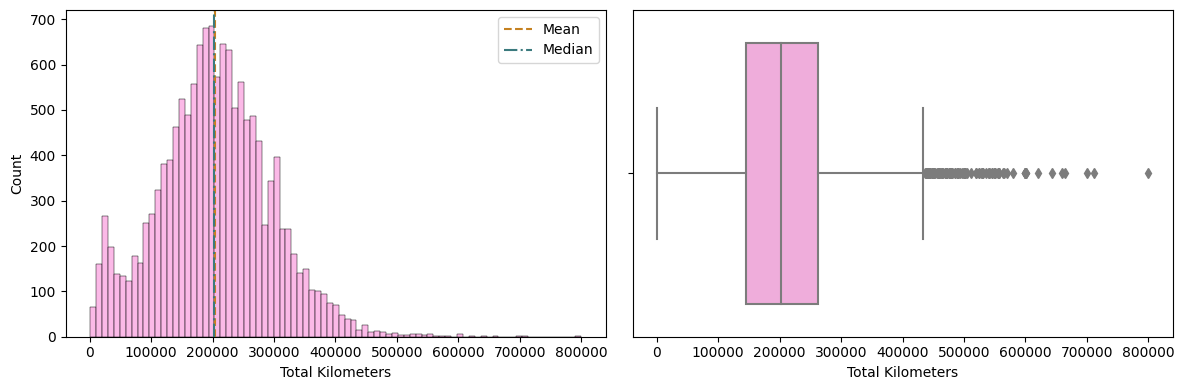

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))

sns.histplot(df['Total_Kilometers'], color=orchid, ax=ax1)
ax1.set_xlabel('Total Kilometers')
ax1.set_ylabel('Count')
ax1.axvline(df['Total_Kilometers'].mean(), color=mean, linestyle='--', label='Mean')
ax1.axvline(df['Total_Kilometers'].median(), color=median, linestyle='-.', label='Median')
ax1.legend()

sns.boxplot(x=df['Total_Kilometers'], color=orchid, ax=ax2)
ax2.set_xlabel('Total Kilometers')

plt.tight_layout()
plt.show()

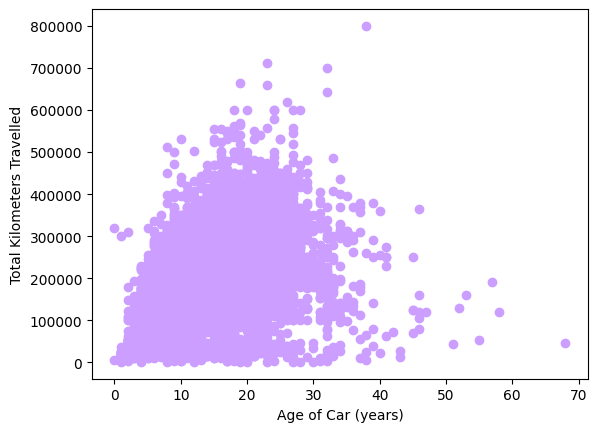

In [20]:
plt.scatter(df['Age'], df['Total_Kilometers'], color=lilac)
plt.xlabel('Age of Car (years)')
plt.ylabel('Total Kilometers Travelled')
plt.show()

The average distance travelled by a car on this market is 200 000 kilometers, with moderate positive correlation between age and the total kilometers.

#### Number of Previous Owners

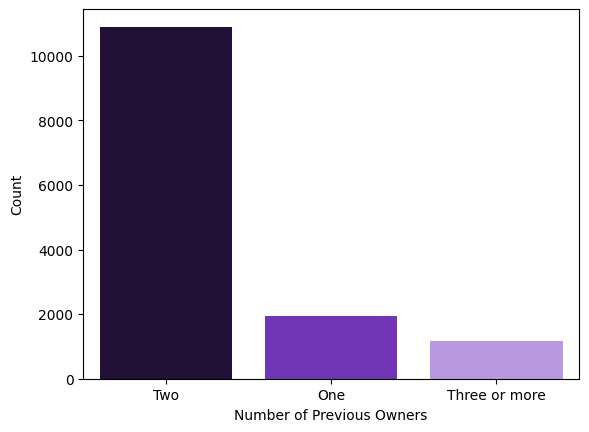

In [21]:
sns.countplot(x='Number_of_Previous_Owners', data=df, palette=purple3)
plt.xlabel('Number of Previous Owners')
plt.ylabel('Count')
plt.show()

Most of the cars on this market have had two previous owners i.e. the second owner is now selling the vehicle.

#### Locations

Number of cars selling in each Croatian county

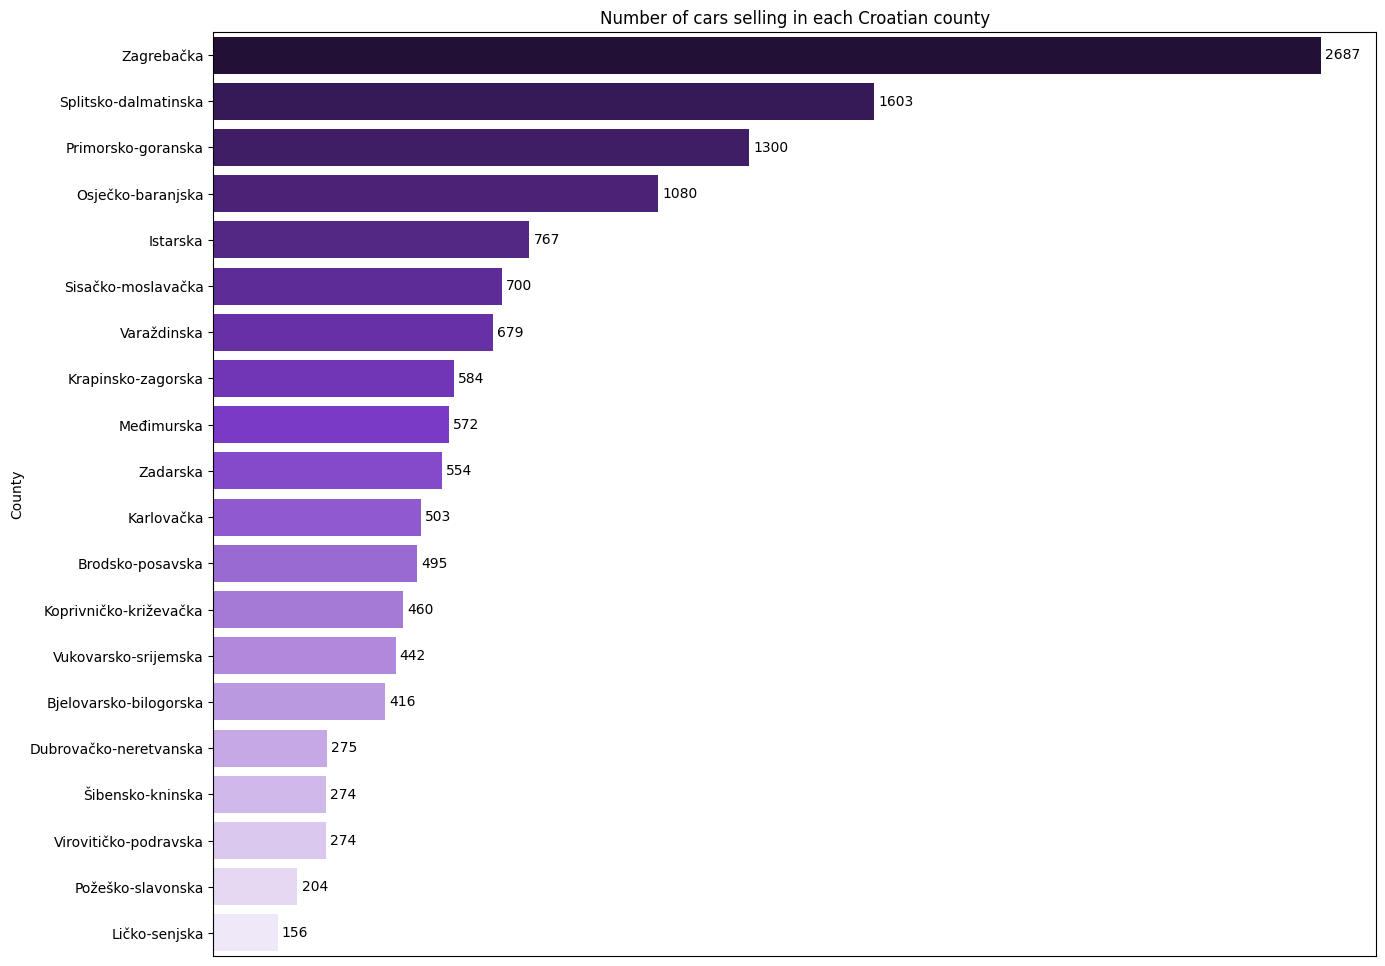

In [22]:
fig, ax = plt.subplots(figsize=(15,12))
sns.countplot(y='County', data=df, palette=purple20, order=df['County'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('County')
plt.title('Number of cars selling in each Croatian county')

for i, p in enumerate(ax.patches):
    ax.text(p.get_width() + 10, p.get_y() + 0.5 * p.get_height(),
            '{}'.format(int(p.get_width())), ha='left', va='center')
    
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel('')

plt.show()


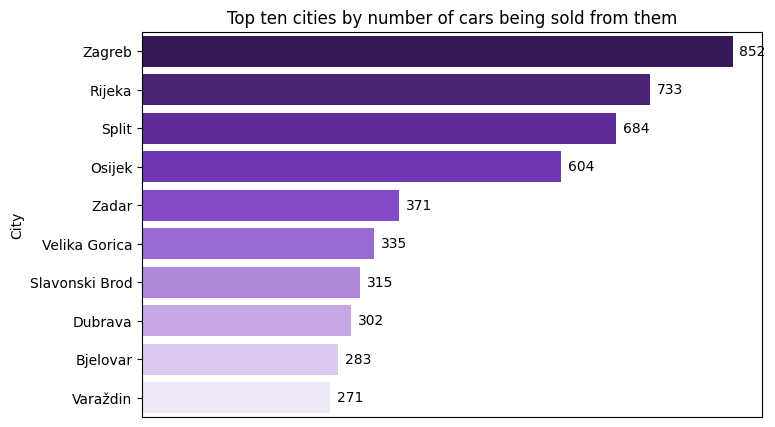

In [23]:
fig, ax = plt.subplots(figsize=(8,5))
top_cities = df['Town'].value_counts().nlargest(10).index.tolist()
sns.countplot(y='Town', data=df, order=top_cities, palette=purple10)
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Top ten cities by number of cars being sold from them')

for i, p in enumerate(ax.patches):
    ax.text(p.get_width() + 10, p.get_y() + 0.5 * p.get_height(),
            '{}'.format(int(p.get_width())), ha='left', va='center')
    
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel('')

plt.show()

### Car Body

#### Car Body Style

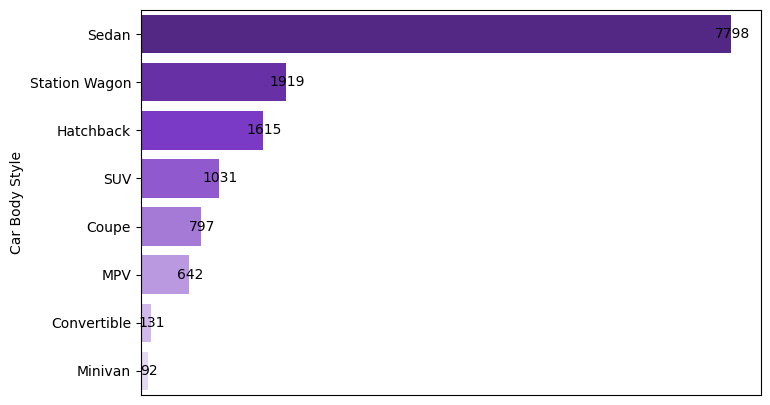

In [24]:
fig, ax = plt.subplots(figsize=(8,5))

sns.countplot(y='Car_Body_Style', data=df, palette=purple8, order=df['Car_Body_Style'].value_counts().index)
plt.ylabel('Car Body Style')
plt.xlabel('Count')

for i, p in enumerate(ax.patches):
    ax.text(p.get_width() + 10, p.get_y() + 0.5 * p.get_height(),
            '{}'.format(int(p.get_width())), ha='center', va='center')

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel('')
    
plt.show()

Sedan is the most popular car style on this market, followed by station wagons and hatchbacks.

#### Color

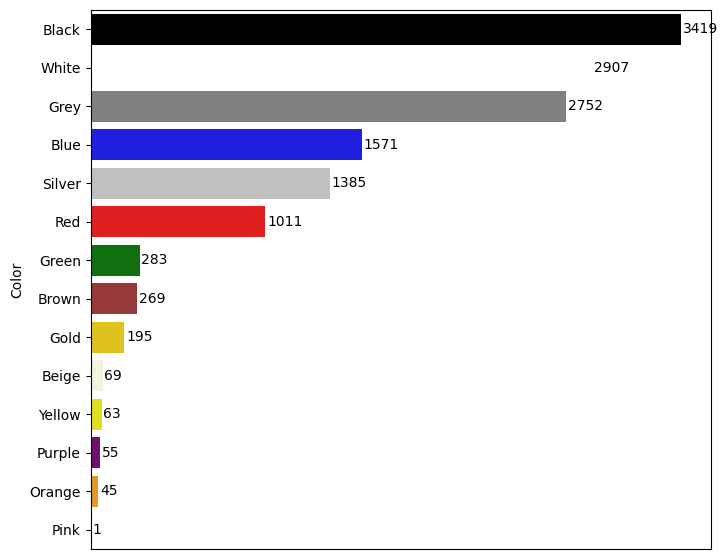

In [25]:
c = ['black', 'white', 'grey', 'blue', 'silver', 'red', 'green', 'brown', 'gold', 'beige', 'yellow', 'purple', 'orange', 'pink']
fig, ax = plt.subplots(figsize=(8,7))
sns.countplot(y='Color', data=df, palette=c, order=df['Color'].value_counts().index)
plt.ylabel('Color')

for i, p in enumerate(ax.patches):
    ax.text(p.get_width() + 10, p.get_y() + 0.5 * p.get_height(),
            '{}'.format(int(p.get_width())), ha='left', va='center')

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel('')
    
plt.show()

#### Number of Doors

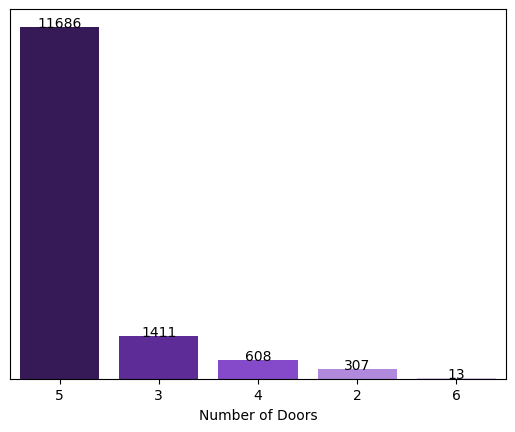

In [26]:
fig, ax = plt.subplots()
sns.countplot(x='Number_of_Doors', data=df, palette=purple5, order=df['Number_of_Doors'].value_counts().index)
plt.xlabel('Number of Doors')
plt.ylabel('Count')

# Add count values on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), int(p.get_height()), ha='center')
    
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_ylabel('')

plt.show()

Most of the cars have 5 doors. One thing to note is that probably 5 and 4, as well as 2 and 3 doors in many cases mean the same thing, depending on how the person posting the ad sees it, but it's just a speculation, so I'll leave each distinct category as it is.

### Make and Model

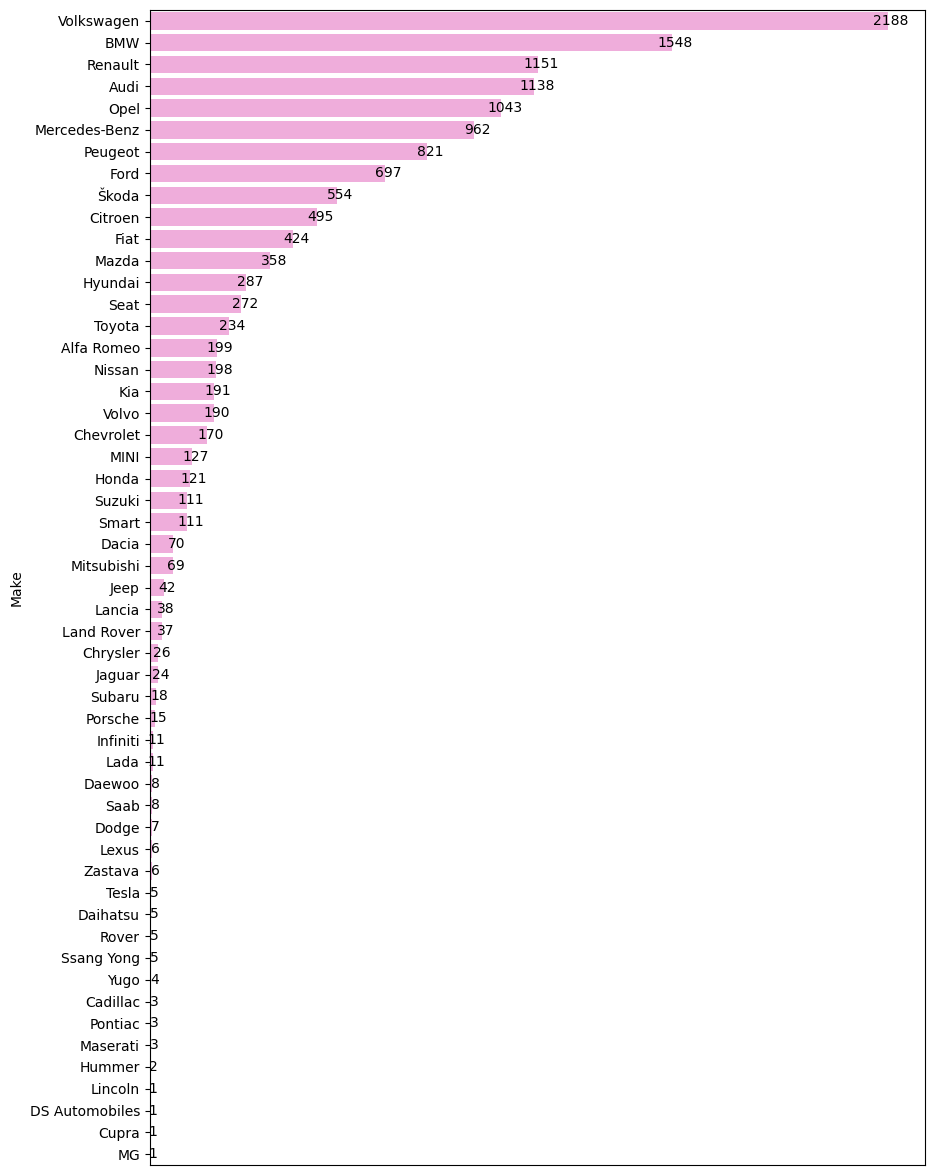

In [27]:
fig, ax = plt.subplots(figsize=(10,15))

sns.countplot(y='Make', data=df, color= orchid, order=df['Make'].value_counts().index)
plt.ylabel('Make')
plt.xlabel('Count')

for i, p in enumerate(ax.patches):
    ax.text(p.get_width() + 10, p.get_y() + 0.5 * p.get_height(),
            '{}'.format(int(p.get_width())), ha='center', va='center')

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel('')
    
plt.show()

There are many different car brands to choose from with Volkswagen in the leading place, followed by BMW, Renault and Audi. 

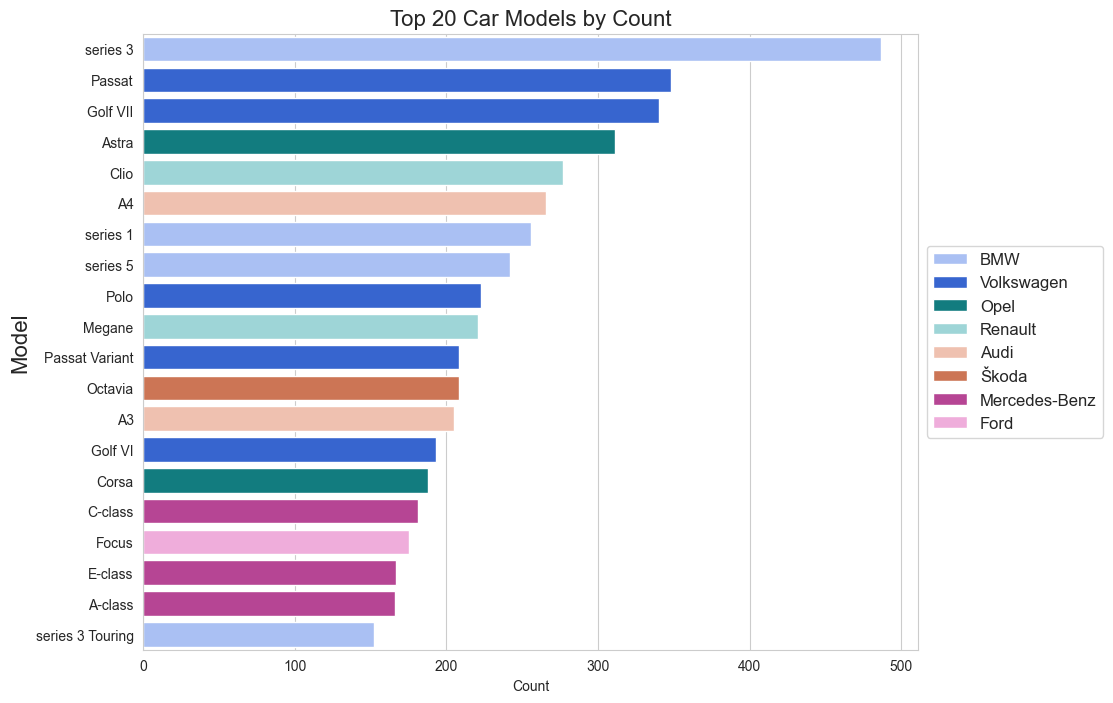

In [28]:
# Get the top 20 models
top_models = df['Model'].value_counts().nlargest(20).index

# Create a new DataFrame with the counts for the top 20 models
model_counts = df[df['Model'].isin(top_models)].groupby(['Make', 'Model']).size().reset_index(name='Count')

# Sort the data by count
model_counts = model_counts.sort_values('Count', ascending=False)

# Create the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='Count', y='Model', hue='Make', data=model_counts, palette=palette8, dodge=False)

# Set the title and axis labels
ax.set_title("Top 20 Car Models by Count", fontsize=16)
ax.set_xlabel('Count')
ax.set_ylabel("Model", fontsize=16)

# Set the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.show()

<Axes: xlabel='Make', ylabel='County'>

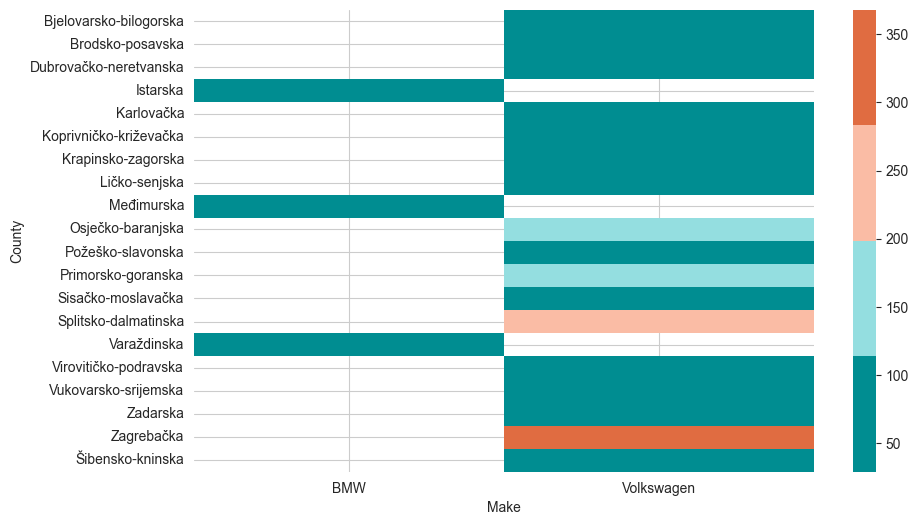

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
# Group data by county and make, and count the number of cars
county_make_counts = df.groupby(['County', 'Make']).size().reset_index(name='Count')

# Get the most popular make for each county
most_popular_make = county_make_counts.groupby('County').apply(lambda x: x.loc[x['Count'].idxmax()])

# Display the results as a heatmap
heatmap_data = most_popular_make.pivot(index='County', columns='Make', values='Count')
sns.heatmap(heatmap_data, cmap=heat, linewidths=0)

VW and BMW are the two options for the most popular brand on a selling market in a Croatian county. BMW takes the first place in three counties and VW has the remaining 17.

### Mechanics 

#### Engine Power

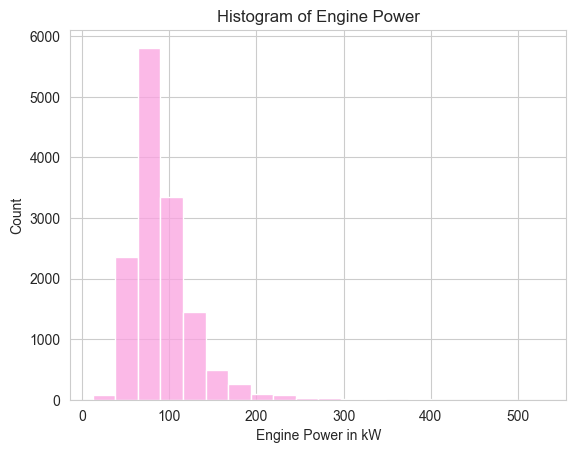

In [30]:
sns.histplot(data=df, x='Engine_Power_in_kW', bins=20, color=orchid)

# Add labels and title
plt.xlabel('Engine Power in kW')
plt.ylabel('Count')
plt.title('Histogram of Engine Power')

# Show plot
plt.show()

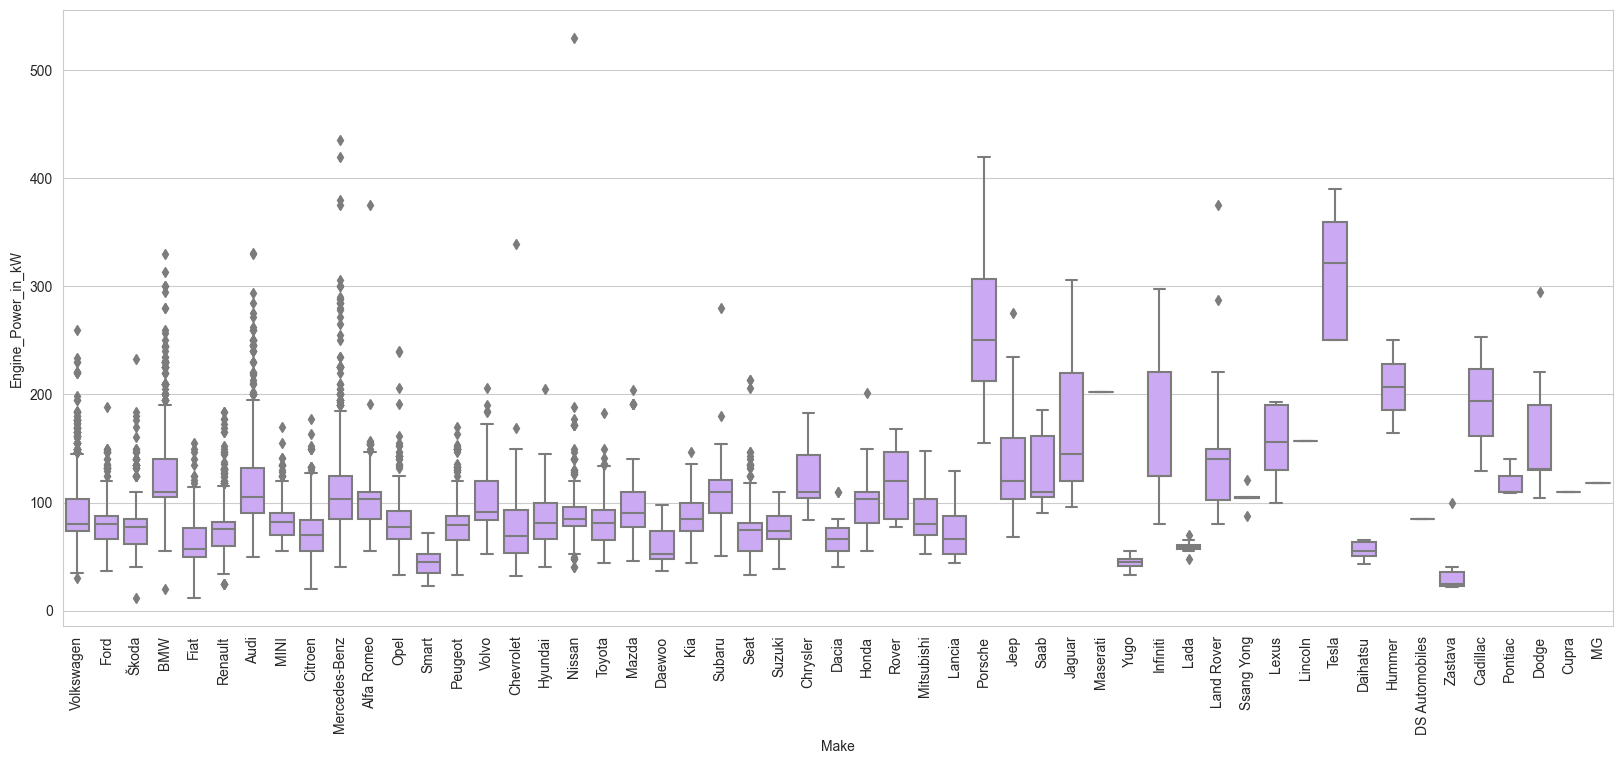

In [31]:
fig, ax = plt.subplots(figsize=(20,8))
plt.xticks(rotation=90)
sns.boxplot(x="Make", y="Engine_Power_in_kW", data=df, palette=[lilac])
plt.show()

I could investigate further into these outliers and possible errors by checking the engine power as described by the car manufacturer for each specific model. However, as I mentioned before, this dataset is derived from an ad site and the data could potentially include inaccuracies or modifications such as tuned engines. Therefore, I'll leave it like this and advise exercising caution when interpreting the data.

#### Fuel Type

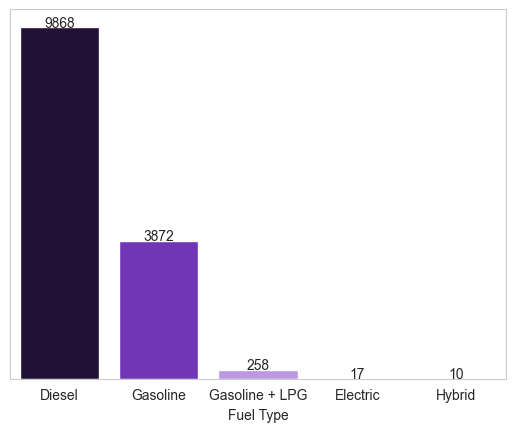

In [32]:
fig, ax = plt.subplots()
sns.countplot(x='Fuel_Type', data=df, palette=purple3, order=df['Fuel_Type'].value_counts().index)
plt.xlabel('Fuel Type')
plt.ylabel('Count')

# Add count values on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), int(p.get_height()), ha='center')

ax.set_yticks([])
ax.set_yticklabels([])
ax.set_ylabel('')

plt.show()

The majority of the cars being sold run on diesel.

#### Transmission

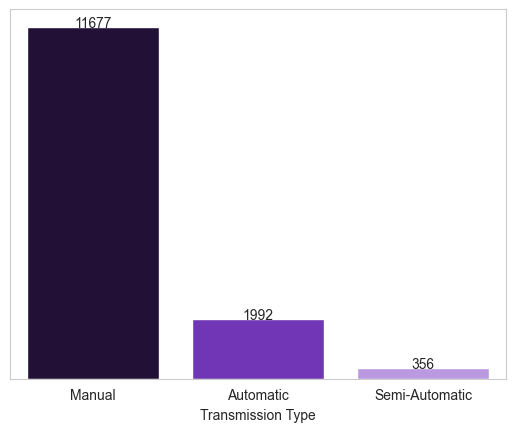

In [33]:
fig, ax = plt.subplots()
sns.countplot(x='Transmission_Type', data=df, palette=purple3, order=df['Transmission_Type'].value_counts().index)
plt.xlabel('Transmission Type')
plt.ylabel('Count')

# Add count values on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), int(p.get_height()), ha='center')
    
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_ylabel('')

plt.show()

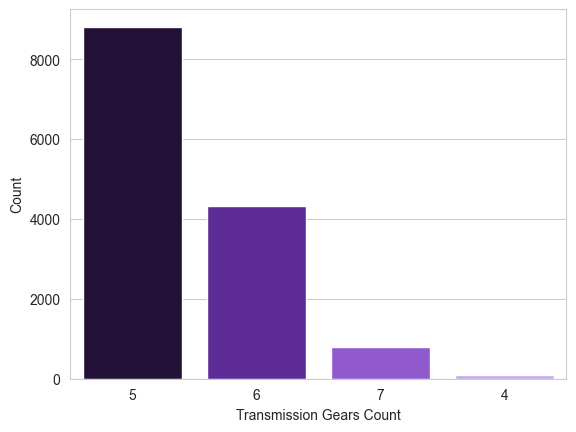

In [34]:
custom_palette = sns.color_palette(['#023047', '#FFB703', '#8ECAE6', '#219EBC'])
sns.set_palette(custom_palette)

sns.countplot(x='Transmission_Gears_Count', data=df, palette=purple4, order=df['Transmission_Gears_Count'].value_counts().index)
plt.xlabel('Transmission Gears Count')
plt.ylabel('Count')
plt.show()

In [35]:
m = round(df['Age'].mean(), 1)
m4gear = round(df[df['Transmission_Gears_Count'] == 4]['Age'].mean(), 1)

means_df = pd.DataFrame({'Population': ['General', '4-speed gearbox'],
                        'Average Age': [m, m4gear]})

means_df

,Population,Average Age
0,General,13.9
1,4-speed gearbox,28.9


The cars available on this market are largely equipped with manual transmissions, with a majority featuring a 5-speed manual gearbox. Cars with a 4-speed gearbox tend to be older on average.

#### Drive Type

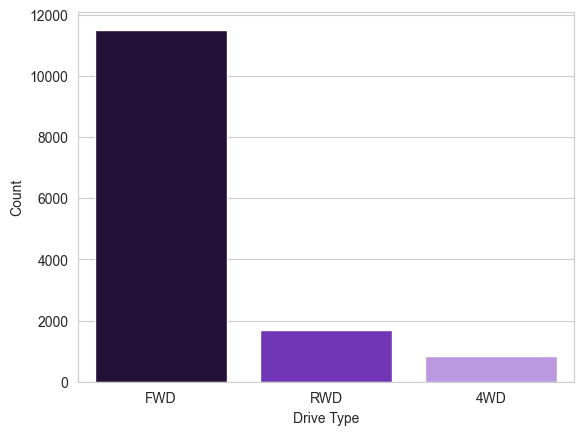

In [36]:
sns.countplot(x='Drive_Type', data=df, palette=purple3, order=df['Drive_Type'].value_counts().index)

plt.xlabel('Drive Type')
plt.ylabel('Count')

plt.show()

A majority of the cars available feature front-wheel drive.

### Price

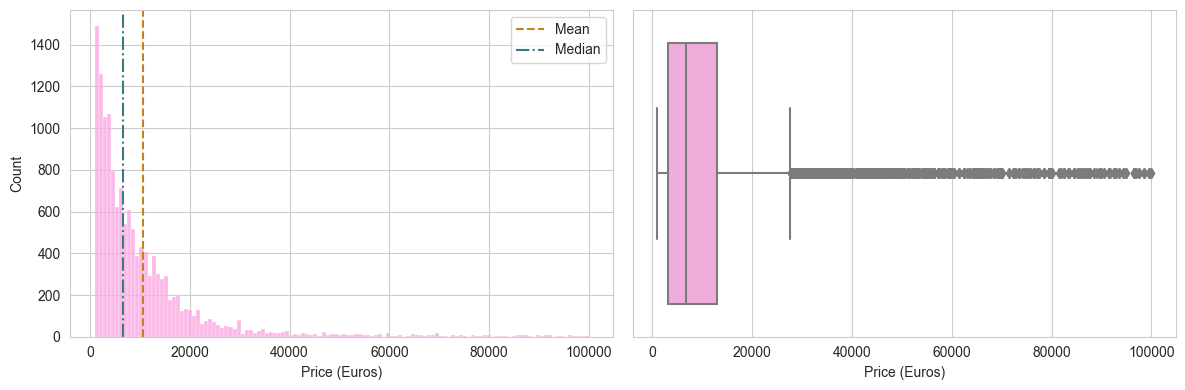

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))

sns.histplot(df['Price_in_Euros'], ax=ax1, color=orchid)
ax1.set_xlabel('Price (Euros)')
ax1.set_ylabel('Count')
ax1.axvline(df['Price_in_Euros'].mean(), color=mean, linestyle='--', label='Mean')
ax1.axvline(df['Price_in_Euros'].median(),  color=median, linestyle='-.', label='Median')
ax1.legend()

sns.boxplot(x=df['Price_in_Euros'], ax=ax2, color=orchid)
ax2.set_xlabel('Price (Euros)')

plt.tight_layout()
plt.show()

This data is right-skewed with some high values that are affecting the mean. I'll look into other variables that might explain these high prices.

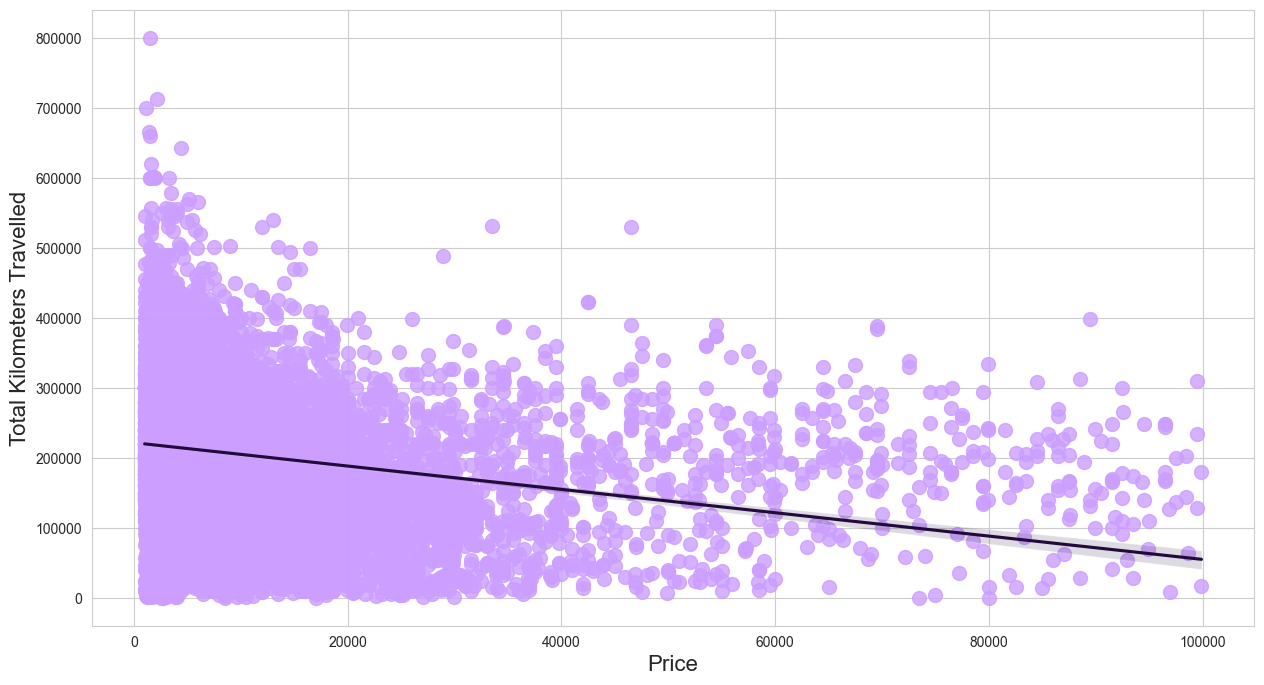

In [38]:
fig, ax = plt.subplots(figsize=(15,8))

sns.regplot(x=df['Price_in_Euros'], y=df['Total_Kilometers'], color='#220a3d', scatter_kws={"s": 100, "color": lilac})
plt.xlabel('Price', fontsize=16)
plt.ylabel('Total Kilometers Travelled', fontsize=16)
plt.show()

As the total kilometers travelled increase, the price of the car tends to decrease slightly, but the relationship between the two is not very strong.

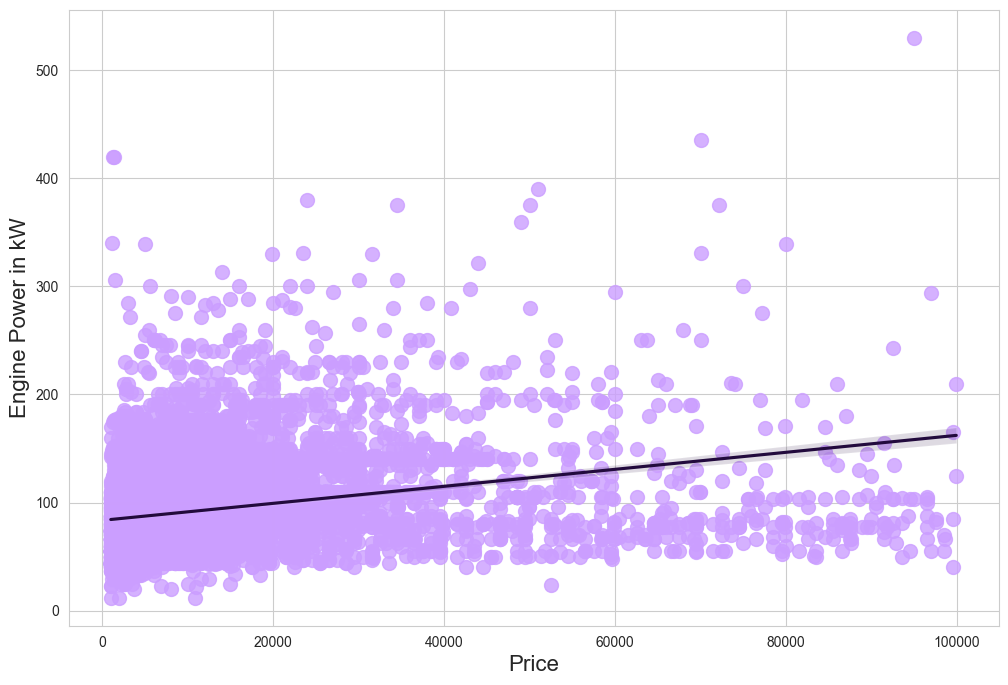

In [39]:
fig, ax = plt.subplots(figsize=(12,8))

sns.regplot(x=df['Price_in_Euros'], y=df['Engine_Power_in_kW'], color='#220a3d', scatter_kws={"s": 100, "color": lilac})
plt.xlabel('Price', fontsize=16)
plt.ylabel('Engine Power in kW', fontsize=16)
plt.show()

As the engine power increases the price follows, but the relationship here as well is not very strong between these two variables.

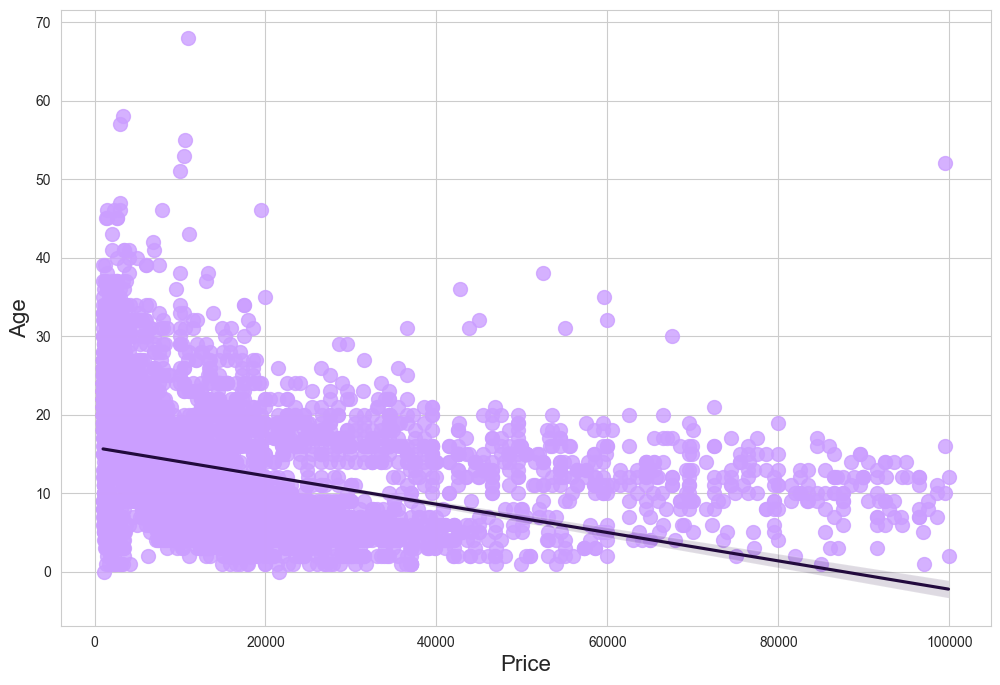

In [40]:
fig, ax = plt.subplots(figsize=(12,8))

sns.regplot(x=df['Price_in_Euros'], y=df['Age'], color='#220a3d', scatter_kws={"s": 100, "color": lilac})
plt.xlabel('Price', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.show()

As the age of the car increases, the price tends to decrease, but the relationship between the two is weak to moderate.

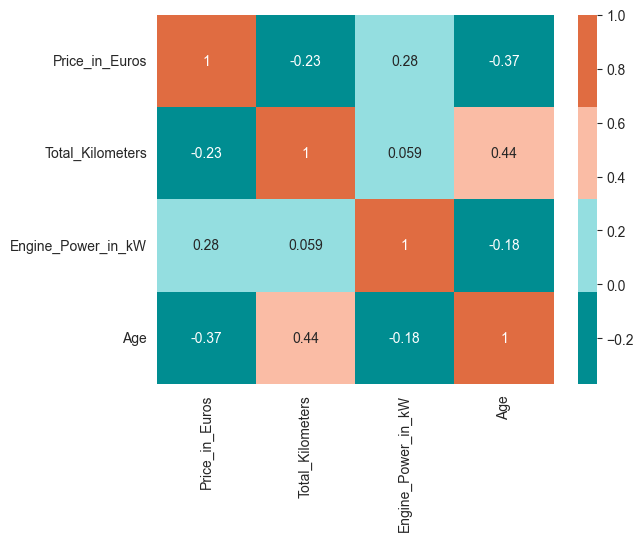

In [41]:
data = df[['Price_in_Euros', 'Total_Kilometers', 'Engine_Power_in_kW', 'Age']]
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap=heat, annot=True)

plt.show()

In [42]:
# Create a list of car brands in the dataset
brand_list = df['Make'].unique().tolist()

# Create a dropdown widget for selecting car brand
brand_dropdown = widgets.Dropdown(options=brand_list, value=brand_list[0], description='Brand')

# Define a function that updates the plots based on the selected brand
def update_plots(brand):
    brand_data = df[df['Make'] == brand]

    # Select variables to plot
    vars_to_plot = ['Age', 'Total_Kilometers', 'Engine_Power_in_kW', 'Price_in_Euros']

    # Create scatterplot matrix for the selected variables
    sns.pairplot(data=brand_data[vars_to_plot], kind='scatter')

# Create an event listener that calls the update_plots function when the dropdown value is changed
widgets.interactive(update_plots, brand=brand_dropdown)

interactive(children=(Dropdown(description='Brand', options=('Volkswagen', 'Ford', 'Škoda', 'BMW', 'Fiat', 'Re…

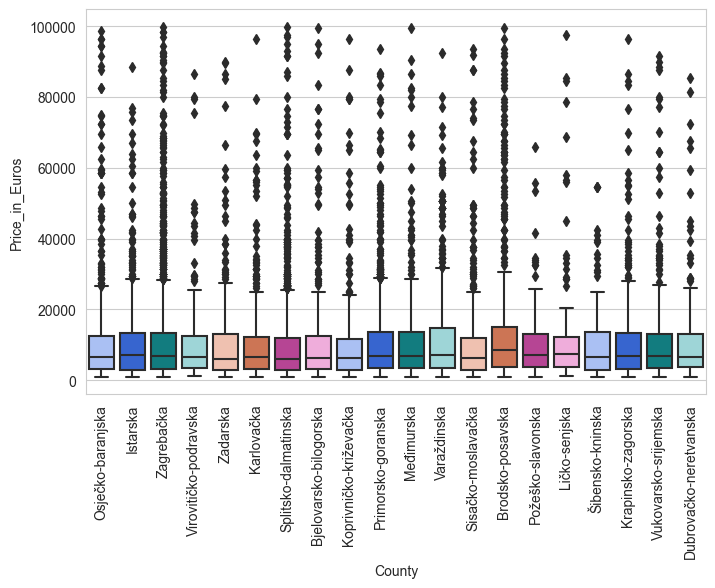

In [43]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))

sns.boxplot(x='County', y='Price_in_Euros', data=df, palette=palette8)

plt.xticks(rotation=90)

plt.show()

The location of the car doesn't seem to affect it's price.

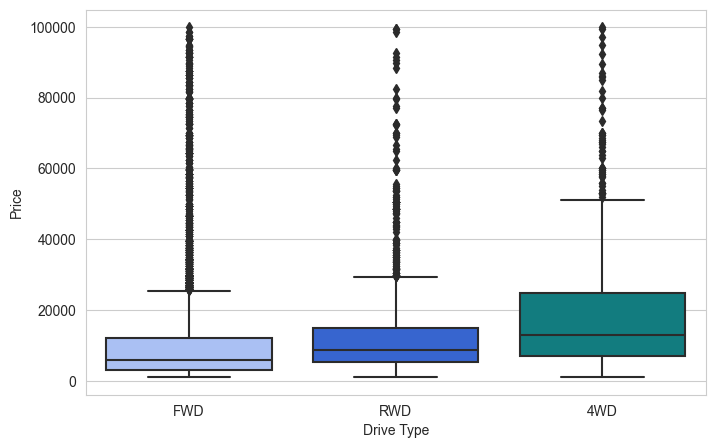

In [44]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='Drive_Type', y='Price_in_Euros', data=df, palette=palette8)

plt.xlabel('Drive Type')
plt.ylabel('Price')

plt.show()

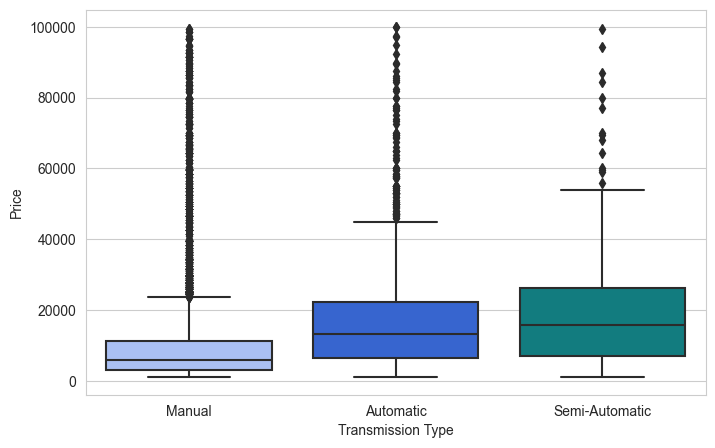

In [45]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='Transmission_Type', y='Price_in_Euros', data=df, palette=palette8)

plt.xlabel('Transmission Type')
plt.ylabel('Price')

plt.show()

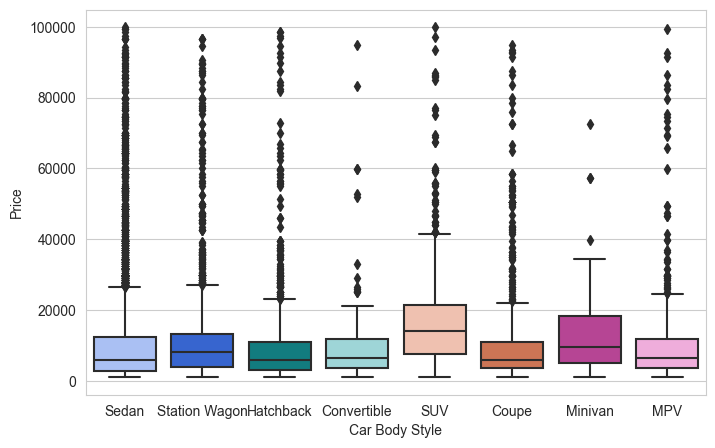

In [46]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='Car_Body_Style', y='Price_in_Euros', data=df, palette=palette8)

plt.xlabel('Car Body Style')
plt.ylabel('Price')

plt.show()

Looking at these two graphs I could look into the suspicion that cars equiped with automatic transmission and 4WD as well as SUVs tend to be more expensive, but again, this is a dataset of used cars. Other variables such as age and total kilometers might have more say in the final price than these variables.

## Fuel Economy

As I've explained before, I'm going to analyse fuel economy of the cars on a subset that has valid values in that column.

In [47]:
fe = df.dropna()

In [48]:
l = 'Fuel_Economy_L/100km'
fe

,Active_Since,Times_Viewed,Price_in_Euros,Ad_title,Fuel_Type,Total_Kilometers,Production_Year,Engine_Power_in_kW,Color,Transmission_Gears_Count,...,Car_Body_Style,Fuel_Economy_L/100km,Number_of_Previous_Owners,Drive_Type,Transmission_Type,Make,Model,Town,County,Age
index,,,,,,,,,,,,,,,,,,,,,
6,2023-03-29,27,2100.0,Ford Focus Karavan 1.8 TDCI\r\n,Diesel,260000,2006-01-01,88,Blue,5,...,Station Wagon,6.0,Two,FWD,Manual,Ford,Focus,Draganić,Karlovačka,17
9,2023-03-29,25,20990.0,"Škoda Superb 2.0TDI Automatik DSG LED&Xenon,AC...",Diesel,132000,2018-01-01,110,Black,7,...,Station Wagon,6.0,One,FWD,Semi-Automatic,Škoda,Superb Combi,Kaštela,Splitsko-dalmatinska,5
12,2023-03-29,25,30990.0,"Audi Q3 35 TDI S-Tronic ACC,LED,Navigacija,-VI...",Diesel,122000,2019-01-01,110,Grey,7,...,SUV,5.0,One,FWD,Semi-Automatic,Audi,Q3,Kaštela,Splitsko-dalmatinska,4
14,2023-03-29,31,1600.0,Fiat Punto 1.2 Odlično stanje.\r\n,Gasoline,216000,2001-01-01,44,Grey,5,...,Sedan,6.0,Two,FWD,Manual,Fiat,Punto,Nova Rača,Bjelovarsko-bilogorska,22
17,2023-03-29,51,3600.0,"Citroen C3 1.1 44 kw, SAMO 80000 KM !\r\n",Gasoline,81000,2008-01-01,44,Blue,5,...,Hatchback,5.0,Two,FWD,Manual,Citroen,C3,Dugo Selo,Zagrebačka,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14026,2018-05-20,3146,7900.0,VW Passat Variant Passat 1.6TDI start-stop\r\n,Diesel,207000,2011-01-01,77,Blue,6,...,Station Wagon,5.7,One,FWD,Manual,Volkswagen,Passat Variant,Daruvar,Bjelovarsko-bilogorska,12
14033,2017-11-20,2703,6000.0,Mercedes CLK coupe 270cdi avantgarde\r\n,Diesel,241000,2005-01-01,125,Silver,5,...,Coupe,6.0,Two,RWD,Automatic,Mercedes-Benz,CLK coupe,Vukovar,Vukovarsko-srijemska,18
14034,2017-11-03,8882,20499.0,"Audi TT, 2.0TDI, full oprema, quattro, reg.6mj...",Diesel,155000,2013-01-01,125,Red,6,...,Coupe,6.0,Two,4WD,Semi-Automatic,Audi,Tt,Velika Gorica,Zagrebačka,10


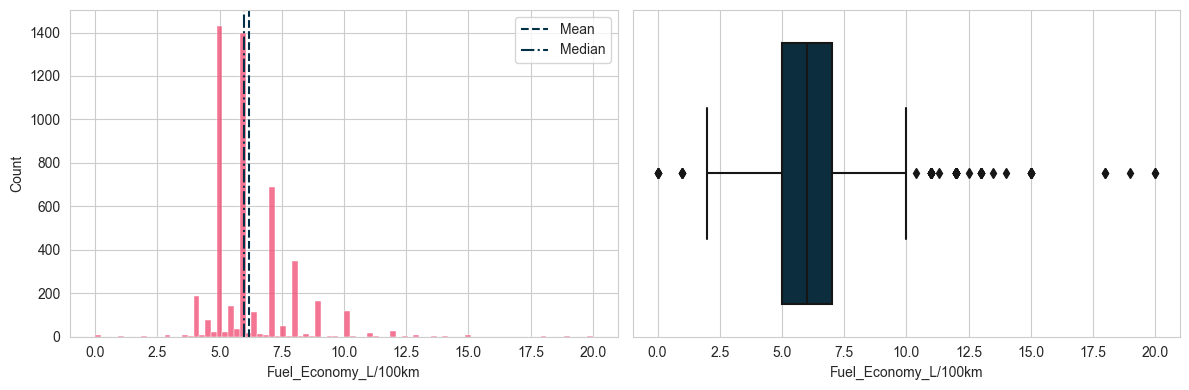

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))

sns.histplot(df[l], color='#ef476f', ax=ax1)
ax1.set_xlabel(l)
ax1.set_ylabel('Count')
ax1.axvline(df[l].mean(), linestyle='--', label='Mean')
ax1.axvline(df[l].median(), linestyle='-.', label='Median')
ax1.legend()

sns.boxplot(x=df[l], ax=ax2)
ax2.set_xlabel(l)

plt.tight_layout()
plt.show()

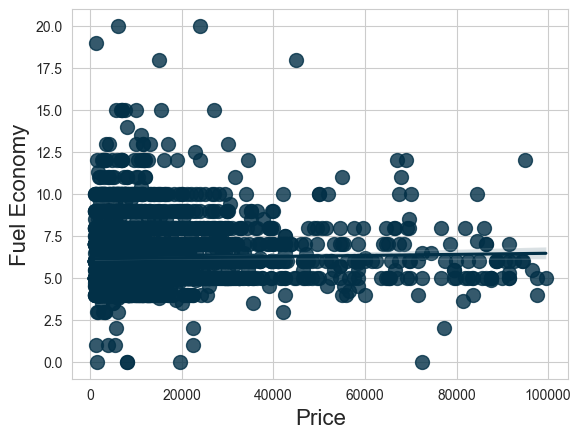

In [50]:
sns.regplot(x=fe['Price_in_Euros'], y=fe[l], scatter_kws={"s": 100})
plt.xlabel('Price', fontsize=16)
plt.ylabel('Fuel Economy', fontsize=16)
plt.show()

Fuel economy alone doesn't seem to drive car prices for this subset of a little less than 5000 cars.

In [51]:
conn.close()